In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#time series analysis
import statsmodels.tsa.stattools as sts
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Forecast analysis

In [19]:
# Plot to display the time series, ACF and PACF
# This code was adapted from the blog Seanabu.com
def tsplot(y, lags=25, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        plt.figure(figsize=figsize) # Set the size of the figure
        
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        plot_acf(y, lags=lags, ax=acf_ax)
        plot_pacf(y, lags=lags, ax=pacf_ax, method='ywm')


        plt.tight_layout()
    return 

In [3]:
df_real = pd.read_csv('./data/realized.csv')
df_fore = pd.read_csv('./data/forecasts.csv')
df_price_up = pd.read_csv('./data/balance_up.csv')
df_price_dw = pd.read_csv('./data/balance_dw.csv')
df_forward = pd.read_csv('./data/forward.csv')

In [4]:
df_real.iloc[:, 1]

0       265.0
1       340.0
2       272.0
3       214.0
4       208.0
        ...  
8755     94.0
8756     81.0
8757     65.0
8758     73.0
8759     59.0
Name: Wind Offshore  - Actual Aggregated [MW], Length: 8760, dtype: float64

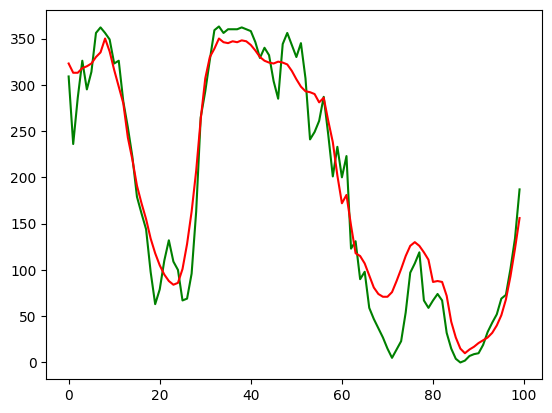

In [5]:
f = plt.figure()
# n = len(df_real)
n = 100
x = range(n)
offset = 1000
plt.plot(x, df_real.iloc[offset:offset+n, 1], 'g-')
plt.plot(x, df_fore.iloc[offset:offset+n, 1], 'r-')
plt.show()

In [6]:
df_diff = df_real.iloc[:, 1] - df_fore.iloc[:, 1]
df_diff.head()

0    12.0
1    12.0
2    15.0
3     4.0
4     4.0
dtype: float64

In [7]:
print(df_real.iloc[:, 1].max())
print(df_fore.iloc[:, 1].max())

377.0
370.0


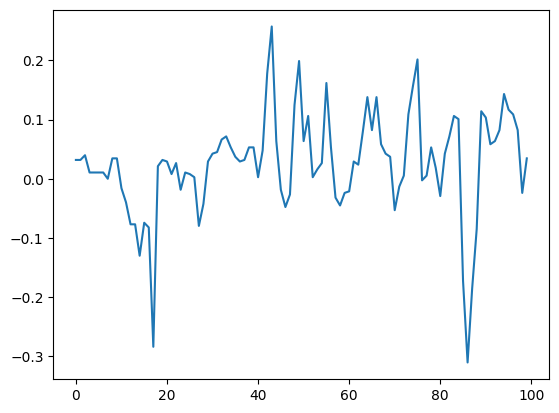

In [23]:
f = plt.figure()
n = len(df_real)
n = 100
x = range(n)
offset = 0
plt.plot(x, df_diff[offset:offset+n]/377.0)
plt.show()

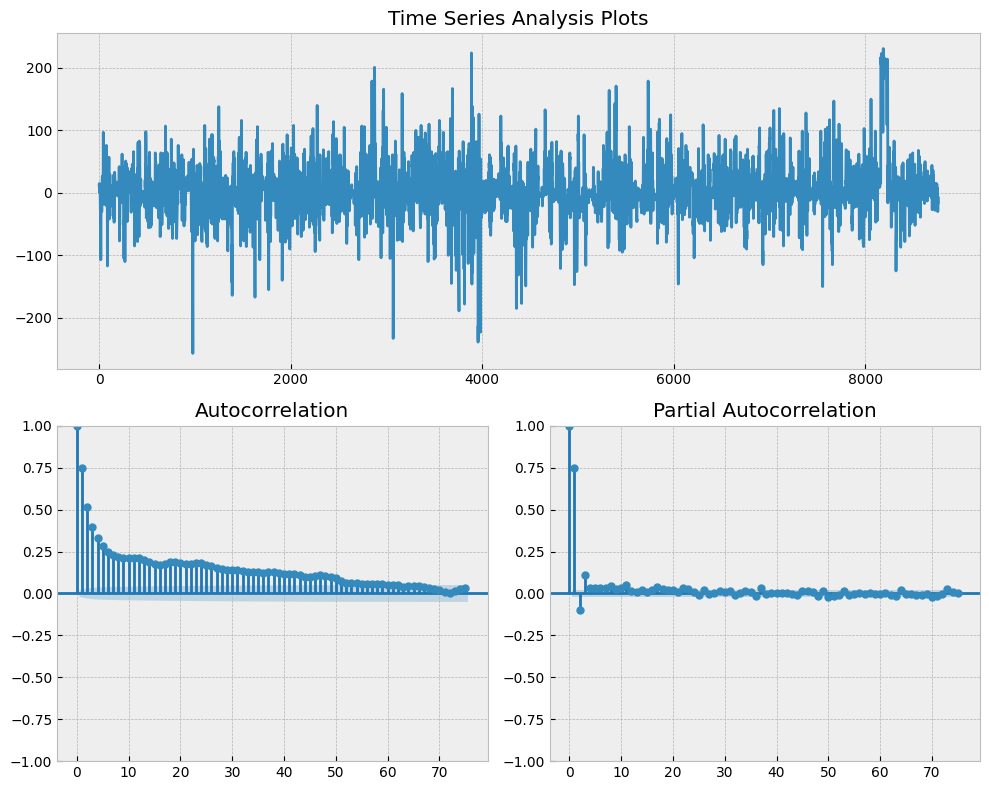

In [9]:
tsplot(df_diff, lags = 75)

exponential decay => we differentiate first period

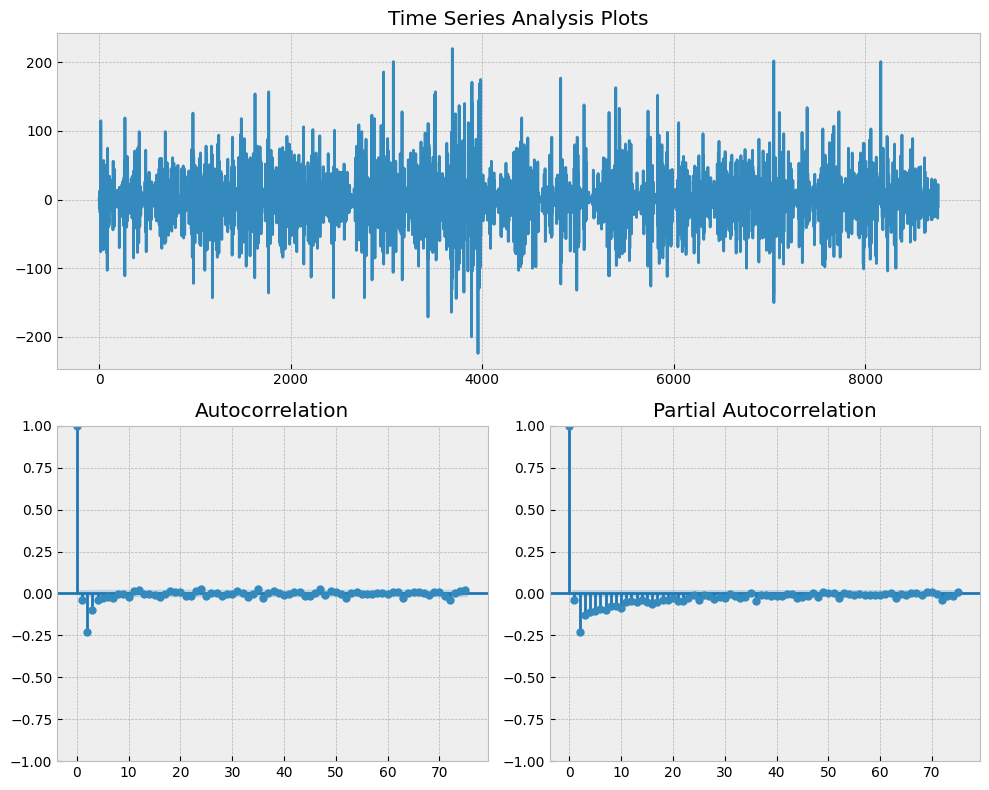

In [10]:
df_diff_1 = df_diff.diff(periods=1).dropna()
tsplot(df_diff_1,lags =75)

#### Conclusion
We might want to construct an ARMA model to estimate the error between forecast and realization with this now stationary data. 
Or maybe not, since it looks like the differenciated series is just white noise?